# Data Cleaning and Feature Engineering

## Modeling Process

**Cross-industry standard process for data mining**, known as **CRISP-DM**, is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model.

6 high level phases of the data mining process:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

The sequence of the phases is not strict and moving back and forth between different phases as it is always required.


<img src='https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png' width ="400">

## Dataset Understanding

Today we are going to be working with the IMDB movie data set.  Our goal is to eventually create a linear regression model that will enable us to predict the box office gross of a movie based on characteristics of the movie.

Before we can start to model, we need to make sure our data is clean an in a usable format.  Therefore we will go through several steps of data cleaning. The code below is not a fully exhaustive list, but includes many of the process you will go through to clean data.  

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols                              #Regression Summary
%matplotlib inline
pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [2]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now let’s quickly see the names and types of the columns. Most of the time you’re going get data that is not quite what you expected, such as dates which are actually strings and other oddities. But to check upfront.

In [3]:
# Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Convert a column to a different data type

The most common example of this is converting a string of number to an actual float or integer.  There are two ways you can achieve this.  

1. astype(float) method

`df['DataFrame Column'] = df['DataFrame Column'].astype(float)`
2.  to_numeric method

`df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')`

What is the difference in these two methods?

(1) For a column that contains numeric values stored as strings;

(2) For a column that contains both numeric and non-numeric values. By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.


https://datatofish.com/convert-string-to-float-dataframe/

In [4]:
df['title_year'][0]

2009.0

In [5]:
"2009/12/30"

'2009/12/30'

In [6]:
df['title_year']= pd.to_datetime(df['title_year'], format='%Y') #look up more info on datetime formats

In [7]:
df.dtypes

color                                object
director_name                        object
num_critic_for_reviews              float64
duration                            float64
director_facebook_likes             float64
actor_3_facebook_likes              float64
actor_2_name                         object
actor_1_facebook_likes              float64
gross                               float64
genres                               object
actor_1_name                         object
movie_title                          object
num_voted_users                       int64
cast_total_facebook_likes             int64
actor_3_name                         object
facenumber_in_poster                float64
plot_keywords                        object
movie_imdb_link                      object
num_user_for_reviews                float64
language                             object
country                              object
content_rating                       object
budget                          

In [8]:
df['title_year']

0      2009-01-01
1      2007-01-01
2      2015-01-01
3      2012-01-01
4             NaT
          ...    
5038   2013-01-01
5039          NaT
5040   2013-01-01
5041   2012-01-01
5042   2004-01-01
Name: title_year, Length: 5043, dtype: datetime64[ns]

### Drop Columns

If you do not plan on using some data in your analysis, feel free to drop those columns. 

In [9]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [10]:
df.drop(columns=['aspect_ratio', 'plot_keywords', 'movie_facebook_likes', 'genres'], inplace=True)

In [11]:
df.shape

(5043, 24)

In [12]:
df.drop([0,1,2,3], axis=0)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013-01-01,470.0,7.7
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaT,593.0,7.5
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013-01-01,0.0,6.3
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012-01-01,719.0,6.3


In [13]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1


In [14]:
df[['gross','budget']]

,gross,budget
0,760505847.0,237000000.0
1,309404152.0,300000000.0
2,200074175.0,245000000.0
3,448130642.0,250000000.0
4,NaN,NaN
...,...,...
5038,NaN,NaN
5039,NaN,NaN
5040,NaN,1400.0
5041,10443.0,NaN


## Investigate the data

In [15]:
df['country'].value_counts()

USA            3807
UK              448
France          154
Canada          126
Germany          97
               ... 
Kenya             1
Philippines       1
Chile             1
Cameroon          1
Indonesia         1
Name: country, Length: 65, dtype: int64

We have movies from many different countries in this data set. If our goal is to only predict movies that were released in theaters, we probably don't want to include foreign movies.  So let's remove them from the data set.


Write code to only leave us with movies from the US.

In [16]:
#your code here

df= df[df['country']=='USA']

In [17]:
df.shape

(3807, 24)

Let's also look at `content_rating`.

In [18]:
df.content_rating

0           PG-13
1           PG-13
3           PG-13
5           PG-13
6           PG-13
          ...    
5037    Not Rated
5039        TV-14
5040          NaN
5041        PG-13
5042           PG
Name: content_rating, Length: 3807, dtype: object

In [19]:
df['content_rating'].value_counts()

R            1571
PG-13        1208
PG            558
G              85
Not Rated      51
Approved       46
Unrated        38
TV-14          25
TV-PG          13
X              12
TV-MA          12
Passed          9
TV-G            8
NC-17           5
GP              4
M               3
TV-Y7           1
Name: content_rating, dtype: int64

In [20]:
df.groupby('content_rating')['gross'].mean()

content_rating
Approved     6.035935e+07
G            9.597624e+07
GP                    NaN
M            1.023089e+08
NC-17        6.394892e+05
Not Rated    4.358239e+06
PG           7.881736e+07
PG-13        7.043976e+07
Passed       1.100354e+07
R            3.490640e+07
TV-14                 NaN
TV-G                  NaN
TV-MA                 NaN
TV-PG                 NaN
TV-Y7                 NaN
Unrated      7.000637e+06
X            2.071797e+07
Name: gross, dtype: float64

In [21]:
#look at the unique values for ratings
ratings = list(df['content_rating'].unique())
ratings

['PG-13',
 'PG',
 'G',
 'R',
 'TV-14',
 'TV-PG',
 'TV-MA',
 'TV-G',
 nan,
 'Unrated',
 'Approved',
 'X',
 'TV-Y7',
 'GP',
 'Not Rated',
 'Passed',
 'M',
 'NC-17']

There are many unique values that don't have a high count or don't make sense to the common user.  How should we handle these?

In [22]:
#create a list of the ratings we want to group
unrated = ['Unrated','Approved', 'Not Rated', 'TV-MA', 'M', 'GP', 'Passed', np.nan, 'X', 'NC-17','TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']

In [23]:
#create a list of the movie ratings we want to maintian
rated = [x for x in ratings if x not in unrated]

In [24]:
rated

['PG-13', 'PG', 'G', 'R']

In [25]:
#create a dictionary with keys of the 'unrated' values and the value being 'unrated'
unrated_dict = dict.fromkeys(unrated, 'unrated')

In [26]:
unrated_dict

{'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

In [27]:
rated

['PG-13', 'PG', 'G', 'R']

In [28]:
#create a dictionary of the rated values
rated_dict  = dict(zip(rated, rated))

In [29]:
rated_dict

{'PG-13': 'PG-13', 'PG': 'PG', 'G': 'G', 'R': 'R'}

In [30]:
#combine those ditionaries into 1
ratings_map = {**rated_dict,**unrated_dict}
ratings_map

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

#### What does `**` do? 

It basically takes the dictionary passed through and unpacks it.  

https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

https://pynash.org/2013/03/13/unpacking/

In [31]:
# use the pandas map function to change the content_rating column
df['rating'] = df['content_rating'].map(ratings_map)

In [32]:
#compare the two columns
df[['rating', 'content_rating']].tail()

,rating,content_rating
5037,unrated,Not Rated
5039,unrated,TV-14
5040,unrated,NaN
5041,PG-13,PG-13
5042,PG,PG


In [33]:
df['rating'].value_counts()

R          1571
PG-13      1208
PG          558
unrated     385
G            85
Name: rating, dtype: int64

## Handling Missing Data:
    


In [34]:
#creates a dataframe of booleans show where data is missing
df.isna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5039,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [35]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.003677
director_name                0.019438
num_critic_for_reviews       0.010244
duration                     0.001576
director_facebook_likes      0.019438
actor_3_facebook_likes       0.003415
actor_2_name                 0.001839
actor_1_facebook_likes       0.001051
gross                        0.150250
actor_1_name                 0.001051
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.003415
facenumber_in_poster         0.003152
movie_imdb_link              0.000000
num_user_for_reviews         0.003415
language                     0.002627
country                      0.000000
content_rating               0.041502
budget                       0.078277
title_year                   0.019438
actor_2_facebook_likes       0.001839
imdb_score                   0.000000
rating                       0.000000
dtype: float64

<AxesSubplot:>

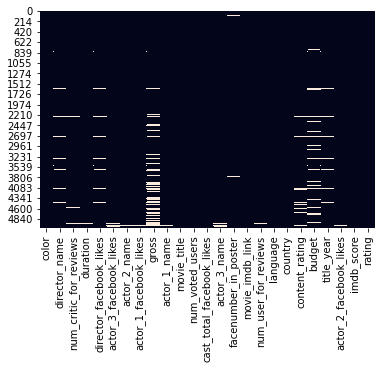

In [36]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

#### Dropping missing rows

One way to handle missing data is just to drop the observation from the data set. This is not always the ideal way since you will lose obseervations, but it might be unavoidable.  For example, we want to predict the gross earnings for each film, so we have to remove those that don't have value for gross.

In [37]:
df.dropna(subset=['gross'], inplace=True)

In [38]:
df_dropped = df.dropna(subset=['gross'])

In [39]:
df.shape

(3235, 25)

<AxesSubplot:>

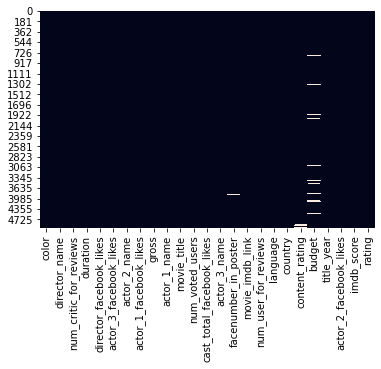

In [40]:
sns.heatmap(df.isnull(), cbar=False)

In [41]:
#look at all the observations with at least one missing data point
df[df['budget'].isna()].head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,A.J. Buckley,The Good Dinosaur,62836,696,Peter Sohn,0.0,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,345.0,English,USA,PG,NaN,2015-01-01,150.0,6.8,PG
444,Color,Gary Winick,120.0,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Steve Buscemi,Charlotte's Web,27838,23907,Oprah Winfrey,0.0,http://www.imdb.com/title/tt0413895/?ref_=fn_t...,102.0,English,USA,G,NaN,2006-01-01,8000.0,6.4,G
477,Color,Henry Jaglom,19.0,117.0,69.0,87.0,Stephen Dillane,898.0,821997.0,Vanessa Redgrave,Déjà Vu,666,1753,Michael Brandon,0.0,http://www.imdb.com/title/tt0119033/?ref_=fn_t...,40.0,English,USA,PG-13,NaN,1997-01-01,577.0,7.0,PG-13
490,Color,Lee Tamahori,95.0,117.0,93.0,904.0,Harold Perrineau,12000.0,27779888.0,Anthony Hopkins,The Edge,55913,14831,Bart the Bear,2.0,http://www.imdb.com/title/tt0119051/?ref_=fn_t...,182.0,English,USA,R,NaN,1997-01-01,1000.0,6.9,R
559,Color,David Pastor,130.0,84.0,10.0,394.0,Kiernan Shipka,3000.0,90820.0,Christopher Meloni,Carriers,35510,4368,Lou Taylor Pucci,0.0,http://www.imdb.com/title/tt0806203/?ref_=fn_t...,119.0,English,USA,PG-13,NaN,2009-01-01,552.0,6.0,PG-13
640,Color,Craig Gillespie,178.0,117.0,44.0,531.0,Abraham Benrubi,788.0,27550735.0,Michael Raymond-James,The Finest Hours,27481,3524,Graham McTavish,0.0,http://www.imdb.com/title/tt2025690/?ref_=fn_t...,113.0,English,USA,PG-13,NaN,2016-01-01,562.0,6.8,PG-13
642,Color,Jay Roach,190.0,114.0,116.0,982.0,Stephanie Szostak,7000.0,72980108.0,Steve Carell,Dinner for Schmucks,80338,10419,Bruce Greenwood,2.0,http://www.imdb.com/title/tt0427152/?ref_=fn_t...,264.0,English,USA,PG-13,NaN,2010-01-01,1000.0,5.9,PG-13
713,Color,Walt Becker,177.0,100.0,12.0,311.0,Tichina Arnold,419.0,168213584.0,Jill Hennessy,Wild Hogs,99989,1412,Drew Sidora,3.0,http://www.imdb.com/title/tt0486946/?ref_=fn_t...,255.0,English,USA,PG-13,NaN,2007-01-01,330.0,5.9,PG-13
773,Color,Kevin Macdonald,252.0,127.0,162.0,379.0,Harry Lennix,18000.0,36965395.0,Robin Wright,State of Play,113295,19776,Michael Weston,3.0,http://www.imdb.com/title/tt0473705/?ref_=fn_t...,235.0,English,USA,PG-13,NaN,2009-01-01,748.0,7.1,PG-13
780,Color,Robert Lorenz,239.0,111.0,39.0,461.0,Ed Lauter,16000.0,35754555.0,Clint Eastwood,Trouble with the Curve,47954,17871,Bob Gunton,0.0,http://www.imdb.com/title/tt2083383/?ref_=fn_t...,150.0,English,USA,PG-13,NaN,2012-01-01,897.0,6.8,PG-13


In [42]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score
num_critic_for_reviews,1.000000,0.276781,0.190413,0.287342,0.179725,0.496316,0.605369,0.260256,-0.029527,0.585526,0.496512,0.283362,0.349493
duration,0.276781,1.000000,0.211680,0.148581,0.097302,0.290107,0.377274,0.142047,0.009502,0.373916,0.303768,0.155812,0.370173
director_facebook_likes,0.190413,0.211680,1.000000,0.123230,0.087571,0.140826,0.318067,0.118263,-0.051733,0.243215,0.095294,0.120522,0.218779
actor_3_facebook_likes,0.287342,0.148581,0.123230,1.000000,0.249727,0.304574,0.285896,0.482827,0.103500,0.226398,0.275393,0.552548,0.083662
actor_1_facebook_likes,0.179725,0.097302,0.087571,0.249727,1.000000,0.137337,0.180328,0.946496,0.059609,0.130476,0.155862,0.380765,0.115114
gross,0.496316,0.290107,0.140826,0.304574,0.137337,1.000000,0.644193,0.229336,-0.031841,0.557896,0.646158,0.251654,0.258876
num_voted_users,0.605369,0.377274,0.318067,0.285896,0.180328,0.644193,1.000000,0.255303,-0.039832,0.786740,0.409577,0.257484,0.493029
cast_total_facebook_likes,0.260256,0.142047,0.118263,0.482827,0.946496,0.229336,0.255303,1.000000,0.080957,0.194216,0.237183,0.631690,0.133214
facenumber_in_poster,-0.029527,0.009502,-0.051733,0.103500,0.059609,-0.031841,-0.039832,0.080957,1.000000,-0.085412,-0.027262,0.065698,-0.078628
num_user_for_reviews,0.585526,0.373916,0.243215,0.226398,0.130476,0.557896,0.786740,0.194216,-0.085412,1.000000,0.411633,0.209788,0.337830


<AxesSubplot:>

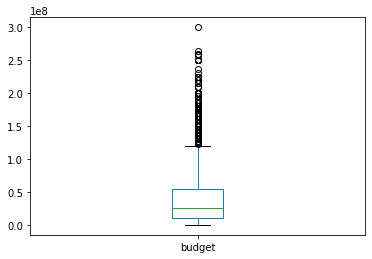

In [43]:
df['budget'].plot(kind='box')

Quite a few films are still missing the values for budget. We do not want to drop this column because we believe it is an important variable, but we must have a value for each observation in order to use it.

**Talk with a partner to think of different ways you can fill in the missing budget values?**

In [44]:
#you can fill the missing values with the average value of the observations
df['budget'].fillna(df['budget'].mean(), inplace=False)

0       2.370000e+08
1       3.000000e+08
3       2.500000e+08
5       2.637000e+08
6       2.580000e+08
            ...     
5033    7.000000e+03
5035    7.000000e+03
5037    9.000000e+03
5041    4.003122e+07
5042    1.100000e+03
Name: budget, Length: 3235, dtype: float64

Another way to fill the missing data

<AxesSubplot:xlabel='rating'>

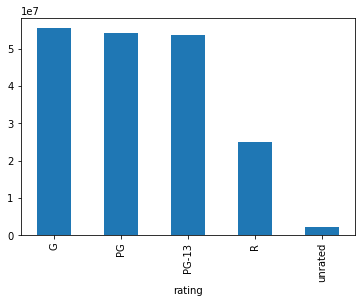

In [45]:
df.groupby('rating')['budget'].mean().plot(kind='bar')

In [46]:
budget_ratings = df.groupby('rating')['budget'].mean().round(1).to_dict() #round by 1 decimal point

budget_ratings

{'G': 55436014.1,
 'PG': 54076105.4,
 'PG-13': 53681048.4,
 'R': 25078901.3,
 'unrated': 2228835.6}

In [47]:
df['budget'].fillna(df['rating'].map(budget_ratings), inplace=True)


<AxesSubplot:>

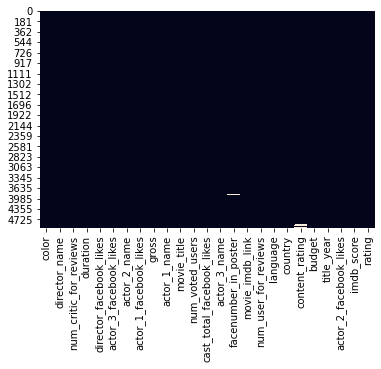

In [48]:
sns.heatmap(df.isnull(), cbar=False)

What statistical test could we use to support our use of this method?
* ANOVA

## Handling Categorical Data

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

For the column of `rating`, we can see that the values come through as strings that represent a category.  We can not put a string through as a value for a linear model. Instead we use dummy variables.

In [49]:
df['rating'].value_counts()

R          1406
PG-13      1162
PG          500
unrated      93
G            74
Name: rating, dtype: int64

A **dummy variable** (aka, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.
- Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

In [50]:
pd.get_dummies(df['rating']).tail(10)

,G,PG,PG-13,R,unrated
5012,0,0,0,1,0
5015,0,0,0,1,0
5021,0,0,0,1,0
5023,0,0,0,0,1
5025,0,0,0,0,1
5033,0,0,1,0,0
5035,0,0,0,1,0
5037,0,0,0,0,1
5041,0,0,1,0,0
5042,0,1,0,0,0



By creating these dummy variables. We can now include them in the model.  


**In our model should we include all of the columns created by `get_dummies`?**


___

Remember multi-collinearity?  


If you have know the values of a movie for `G`, `PG`, `PG-13`, and `R`, then you already know the value for `unrated`.

Multi-collinearity can exist in the combination of multiple columns, so we need to drop one of them.  

Using all the dummy variables derived from a category is known as the dummy variable trap. Avoid this trap!
- Either don't include in the model _or_ use the parameter `drop_first=True` (see below)

In [51]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13


In [52]:
df_dummy = pd.get_dummies(df, columns=['rating'], drop_first=True)

In [53]:
df_dummy

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating_PG,rating_PG-13,rating_R,rating_unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004-01-01,45.0,7.0,0,1,0,0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992-01-01,20.0,6.9,0,0,1,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011-01-01,205.0,6.4,0,0,0,1
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,53681048.4,2012-01-01,719.0,6.3,0,1,0,0


In [54]:
df = pd.concat([df, pd.get_dummies(df['rating'])], 1)
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,PG,0,1,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5,PG-13,0,0,1,0,0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016-01-01,4000.0,6.9,PG-13,0,0,1,0,0
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Kevin Spacey,Superman Returns,240396,29991,Frank Langella,0.0,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006-01-01,10000.0,6.1,PG-13,0,0,1,0,0
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2.0,http://www.imdb.com/title/tt0383574/?ref_=fn_t...,1832.0,English,USA,PG-13,225000000.0,2006-01-01,5000.0,7.3,PG-13,0,0,1,0,0


## Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

<AxesSubplot:>

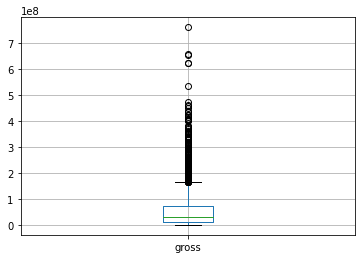

In [55]:
df.boxplot(['gross'])

In [56]:
df.sort_values('gross', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997-01-01,14000.0,7.7,PG-13,0,0,1,0,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015-01-01,2000.0,7.0,PG-13,0,0,1,0,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,PG-13,0,0,1,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Color,U. Roberto Romano,3.0,80.0,6.0,NaN,NaN,NaN,2245.0,NaN,The Harvest/La Cosecha,57,0,NaN,0.0,http://www.imdb.com/title/tt1981703/?ref_=fn_t...,2.0,English,USA,NaN,560000.0,2011-01-01,NaN,7.2,unrated,0,0,0,0,1
4843,Color,John D. Hancock,4.0,110.0,44.0,221.0,Elizabeth Stenholt,644.0,1711.0,Trish Basinger,The Looking Glass,82,1440,Mary Norwood,0.0,http://www.imdb.com/title/tt2912776/?ref_=fn_t...,1.0,English,USA,NaN,2228835.6,2015-01-01,503.0,6.6,unrated,0,0,0,0,1
4758,Color,Alex Craig Mann,29.0,87.0,38.0,445.0,Christa B. Allen,552.0,1332.0,Justin Chon,Detention of the Dead,2038,2251,Max Adler,6.0,http://www.imdb.com/title/tt1865346/?ref_=fn_t...,20.0,English,USA,Not Rated,500000.0,2012-01-01,533.0,4.6,unrated,0,0,0,0,1
4915,Color,Ricki Stern,11.0,106.0,15.0,0.0,Evelyn Jefferson,2.0,1111.0,Darryl Hunt,The Trials of Darryl Hunt,771,2,John Reeves,0.0,http://www.imdb.com/title/tt0446055/?ref_=fn_t...,10.0,English,USA,PG-13,200000.0,2006-01-01,0.0,7.7,PG-13,0,0,1,0,0


In [57]:
# Calculate gross amount that is 5 times above the standard deviation
above_5std = df.gross.mean()+(5*df.gross.std())
above_5std

413880226.5631133

### How to handle movies that are not in the expected range of outputs

In [58]:
df.shape

(3235, 30)

Remove movies that made less than $1mil

In [59]:
df = df[df['gross']>1000000]
df.shape

(2914, 30)

Replace blockbuster movies with maximum value

***here is an example of how to do it, but do not save those values here becasue there is anotehr way of dealing with this later in the notebook***

In [60]:
np.where(df['gross']>above_5std, above_5std, df['gross'])

array([4.13880227e+08, 3.09404152e+08, 4.13880227e+08, ...,
       1.04999680e+07, 1.22750800e+06, 2.04092000e+06])

## Feature Engineering

### Creating New columns based on other columns

In [61]:
df['actor_1_facebook_likes'].describe()

count      2914.000000
mean       8281.275223
std       16313.786953
min           0.000000
25%         833.000000
50%        2000.000000
75%       13000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [62]:
# Create a new column called df.superstar where the value is 1
# if df.actor_1_facebook_likes is greater th000 and 0 if not
df['superstar'] = np.where(df['actor_1_facebook_likes']>=25000, 1, 0)

df[['movie_title', 'actor_1_name','actor_1_facebook_likes', 'superstar']].head(10)

,movie_title,actor_1_name,actor_1_facebook_likes,superstar
0,Avatar,CCH Pounder,1000.0,0
1,Pirates of the Caribbean: At World's End,Johnny Depp,40000.0,1
3,The Dark Knight Rises,Tom Hardy,27000.0,1
5,John Carter,Daryl Sabara,640.0,0
6,Spider-Man 3,J.K. Simmons,24000.0,0
7,Tangled,Brad Garrett,799.0,0
8,Avengers: Age of Ultron,Chris Hemsworth,26000.0,1
10,Batman v Superman: Dawn of Justice,Henry Cavill,15000.0,0
11,Superman Returns,Kevin Spacey,18000.0,0
13,Pirates of the Caribbean: Dead Man's Chest,Johnny Depp,40000.0,1


In [63]:
df['years_old'] = 2016- pd.DatetimeIndex(df['title_year']).year


In [64]:
df['years_old'] 

0        7
1        9
3        4
5        4
6        9
        ..
4984    21
5008    22
5012     2
5015    25
5035    24
Name: years_old, Length: 2914, dtype: int64

**Create your own new column of data using the method above.**

In [65]:
#your code here

Another data cleaning Resource:

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

### Geospatial Data

This dataset currently comes with the latitude and longitude of each house. This is probably not that useful for us. So now we need  to think about how to transform this data into something more useful.

Looking at the map below, which aparment might cost more to rent 1  or 2?
Why?


<img src='imgs/geospatial_vars.png'/>

Looking at this map of East Harlem, how could  we transform lat and long into a more useful data point?

### Time Aggregations:

Imagine this situation. 

You are trying to predict sales for a bar in Williamsburg that has an outdoor patio. You know that weather impacts the sales and want to include it in your features.  

Right now you have weather data at a hourly level, but your sales data is at a daily level. How should we aggregate/convert our hourly data into our daily data?

**EX:** For temperature, I believe that what is most important is how warm it got that day, so I take my hourly data and `resample`  it to give me the max for the day.  

```df['temp'].resample('D').max()```

### Question
Now let's think about this for rain.  Talk with your partner and come up with 3 ways that you can take hourly rain measurements and aggregate it up to a daily level. 

***Hint:*** The outdoor space is primarily used from 12-8pm.  

## Multiple Linear Regression Applied

Now let's fit a model to this data where we try to explain the variance in the box office gross of a movie, using differen variables.  

Try first only including a few variables and see how your model performs according to the R^2 value.  Then add on more variables to see how it impacts the R^2 value. 

***Here we are subsetting our data frame to only movies with MPAA ratings***

In [66]:
df = df[df['content_rating'].isin(['G', 'PG-13', 'PG', 'R'])]

In [67]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated,superstar,years_old
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0,0,7
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0,1,9
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0,1,4
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0,0,4
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0,0,9


Now that we have our data cleaned up, what should we do before putting all of the features into the model?


In [68]:
mlr_model = ols(formula='gross~duration+budget+years_old+superstar+G+PG+R+cast_total_facebook_likes', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     264.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:34:44   Log-Likelihood:                -55352.
No. Observations:                2875   AIC:                         1.107e+05
Df Residuals:                    2866   BIC:                         1.108e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -2.907e+07   5.64e+06     -5.153      0.000   -4.01e+07    -1.8e+07
duration                    3.23e+05    5.2e+04      6.215      0.000    2.21e+05    4.25e+05
budget                        0.9597      0.028     34.016      0.000       0.904       1.015
years_old                  8.448e+05   1.29e+05      6.530      0.000    5.91e+05     1.1e+06
superstar                  5.077e+06   5.51e+06      0.922      0.357   -5.72e+06    1.59e+07
G                          2.695e+07    6.9e+06      3.908      0.000    1.34e+07    4.05e+07
PG                         9.098e+06   3.12e+06      2.919      0.004    2.99e+06    1.52e+07
R                         -8.715e+06   2.43e+06     -3.582      0.000   -1.35e+07   -3.94e+06
cast_total_facebook_likes   315.5138     62.885      5.017      0.000     192.209     438.819
==============================================================================
Omnibus:                     1537.177   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19045.985
Skew:                           2.260   Prob(JB):                         0.00
Kurtosis:                      14.771   Cond. No.                     4.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* PG movies making about 9mil more than PG-13 movies (the one we dropped)

### Interpreting Dummy Coefficients

In [69]:
mlr_model = ols(formula='gross~G+PG+R', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     68.65
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           7.20e-43
Time:                        13:34:45   Log-Likelihood:                -56068.
No. Observations:                2876   AIC:                         1.121e+05
Df Residuals:                    2872   BIC:                         1.122e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.399e+07   2.13e+06     34.707      0.000    6.98e+07    7.82e+07
G           2.464e+07   8.62e+06      2.857      0.004    7.73e+06    4.15e+07
PG          8.433e+06   3.88e+06      2.173      0.030    8.23e+05     1.6e+07
R           -3.38e+07   2.94e+06    -11.484      0.000   -3.96e+07    -2.8e+07
==============================================================================
Omnibus:                     1838.030   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25537.170
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      16.446   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The coefficient for a dummy variable tells you the unit increase for an observation in that category compared to the categories not included in the model.**
In the above example, the category left out is PG-13. Therefore you can interpret the coefficent for the movie R to tell you the difference in the predicted gross of an R-rated movie compared to a PG-13 rated movie.   

In [70]:
df.groupby('rating')['gross'].mean()

rating
G        9.863074e+07
PG       8.242561e+07
PG-13    7.399285e+07
R        4.018816e+07
Name: gross, dtype: float64

## Linear Regression Assumptions

1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed. Doesn't mean the feature need to be normally destributed however. **Don't want a pattern in the errors.**


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.



Basically, when we plot our residuals, we don't want to see a trend in what we get wrong.

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_e99c/lightboxImage.img.png/1548702854476.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_7320/lightboxImage.img.png/1548702854735.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_dccd/lightboxImage.img.png/1548702855060.png' width=700>

[Source](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/)

## Working with SKlearn

While statsmodels is great at givings up a nice model summary to read and interpret, it lacks functionality when it comes doing additional tasks. SKLearn is the standard machine learning package for python, so we will start utilizing that from here on out.  

In [71]:
subset =[
 'director_facebook_likes',
 'cast_total_facebook_likes',
 'budget','G', 'PG', 
'R', 'superstar', 'years_old']

In [72]:
df[subset]

,director_facebook_likes,cast_total_facebook_likes,budget,G,PG,R,superstar,years_old
0,0.0,4834,237000000.0,0,0,0,0,7
1,563.0,48350,300000000.0,0,0,0,1,9
3,22000.0,106759,250000000.0,0,0,0,1,4
5,475.0,1873,263700000.0,0,0,0,0,4
6,0.0,46055,258000000.0,0,0,0,0,9
...,...,...,...,...,...,...,...,...
4984,0.0,388,25000.0,0,0,1,0,21
5008,0.0,2103,230000.0,0,0,1,0,22
5012,453.0,1458,35000000.0,0,0,1,0,2
5015,0.0,5,23000.0,0,0,1,0,25


### How to fit a model in SKlearn

In [73]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[subset], df['gross']) #features against y-variable of 'gross'

LinearRegression()

***Sklearn does not have a pretty output like statsmodel, but we can still access the information***

In [74]:
print(lm.intercept_)
print(lm.coef_)

1669862.06250152
[ 1.46407963e+03  3.14935018e+02  1.00894515e+00  2.27519579e+07
  6.18020243e+06 -8.05915620e+06  4.90197472e+06  9.75259750e+05]


Now that we have fit a model let's use that model to predict the gross of each movie in our dataset.  This will allow us to evaluate how well the model is doing. 

In [75]:
y_pred = lm.predict(df[subset])

In [76]:
y_pred[:100]

array([2.49139076e+08, 3.34084103e+08, 3.28541062e+08, 2.72915047e+08,
       2.85259380e+08, 2.76690530e+08, 2.88757405e+08, 2.61606310e+08,
       2.31737211e+08, 2.59431308e+08, 2.41655581e+08, 2.38062892e+08,
       2.49930007e+08, 2.60059664e+08, 2.81086001e+08, 2.36818169e+08,
       2.47279801e+08, 2.10332099e+08, 2.34490584e+08, 1.99838016e+08,
       2.41133108e+08, 2.74450931e+08, 2.25621478e+08, 1.57185003e+08,
       2.28826409e+08, 2.17430963e+08, 2.64606921e+08, 2.33871679e+08,
       2.11299170e+08, 2.16754823e+08, 2.55730168e+08, 2.15105648e+08,
       1.93801813e+08, 2.33211694e+08, 2.14273730e+08, 2.38255953e+08,
       2.19475126e+08, 2.24173781e+08, 2.07074906e+08, 2.39107154e+08,
       2.23535408e+08, 2.01896120e+08, 2.14658406e+08, 2.02331264e+08,
       2.04107091e+08, 2.21335020e+08, 6.37697841e+07, 2.00064194e+08,
       1.89739671e+08, 2.15466394e+08, 1.52668736e+08, 2.12097056e+08,
       2.31859306e+08, 1.95126602e+08, 1.90361608e+08, 2.00719944e+08,
      

In [78]:
list(zip(subset, lm.coef_))

[('director_facebook_likes', 1464.0796291713273),
 ('cast_total_facebook_likes', 314.9350181679586),
 ('budget', 1.0089451461430805),
 ('G', 22751957.9476976),
 ('PG', 6180202.428245877),
 ('R', -8059156.198546482),
 ('superstar', 4901974.715669082),
 ('years_old', 975259.7502506203)]

In [77]:
y_pred = lm.predict(df[subset])

In [91]:
lm.predict([[10000, 100000, 40000000, 0, 0, 0, 1, 1]])

array([94039200.48265359])

Text(0, 0.5, 'Predictions')

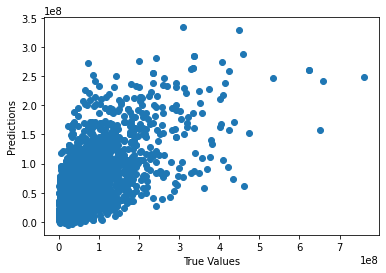

In [79]:
## The line / model
plt.scatter( df['gross'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Evaluate the Model

In [81]:
lm.score(df[subset], df['gross'])

0.42186019312329515

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
mae = mean_absolute_error(df['gross'], y_pred)
mse = mean_squared_error(df['gross'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

36095054.08707363
55769699.36516909


### Plot our residuals

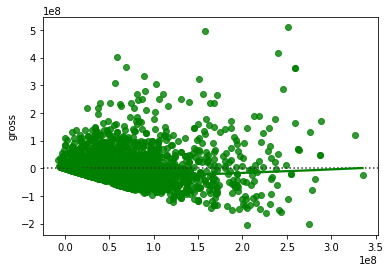

In [86]:
sns.residplot(y_pred, df['gross'], lowess=True, color="g") #variance increasing as target goes up (heteroskedastic)

### Plot the distribution of the residuals

In [84]:
residuals =  df['gross']- y_pred

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


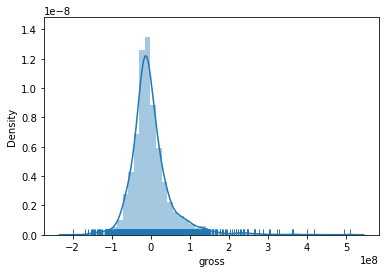

In [85]:
sns.distplot(residuals, kde=True, rug=True);

Use the **Shapiro-Wilk test**, built in python library available and you can decide based on p-value you decide, usually we reject H0 at 5% significance level meaning if p-value is greater than 0.05 then we accept it as normal distribution. 

In [107]:
from scipy import stats

In [108]:
print (stats.shapiro(residuals))


ShapiroResult(statistic=0.831620991230011, pvalue=0.0)


**QQ-plot:** A very popular plot to see whether the distribution of data follow normal distribution.

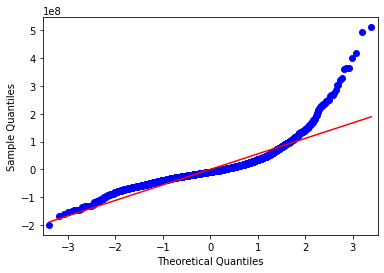

In [106]:
import statsmodels.api as sm 

fig = sm.qqplot(residuals,line='s')
plt.show()

https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0

#### How do we fix the normality issue:
Usually there are 3 reasons why this issue(error does not follow normal distribution) would occur:
- Non linear relationship between features and target
- Dependent or independent variables are too non-normal(can see from skewness or kurtosis of the variable)
- Existence of a few outliers/extreme values which disrupt the model prediction

https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

## Capturing Non-linear relationships

We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

https://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression

***Graph of a non-linear relationship***

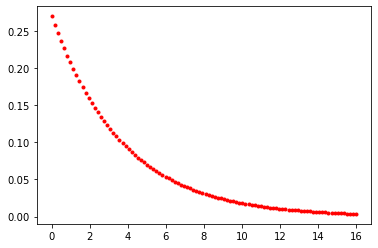

In [92]:
x = np.linspace(0, 16, 100)
Y = [0.27*np.exp(-0.27*_) for _ in x]
# error = norm.rvs(0, scale=0.03, size=100)
# simulated_data = [max(0, y+e) for (y,e) in zip(Y,error)]

# plt.plot(x, Y, 'b-')
plt.plot(x, Y, 'r.')
plt.show()

***Using a non-linear tansformation, taking the log of the target variable, to create a linear relationship***

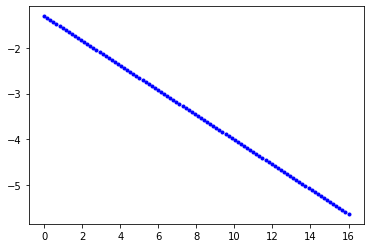

In [93]:
log_y = np.log(Y)

plt.plot(x, log_y, 'b.')
plt.show()

***Another non-linear relationship***

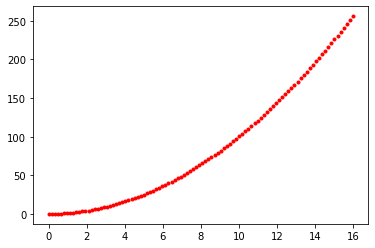

In [94]:
y = x*x

plt.plot(x, y, 'r.')
plt.show()

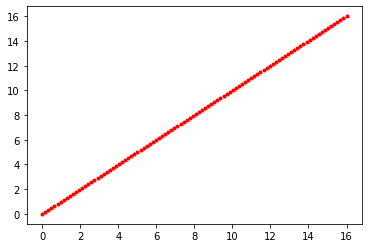

In [95]:
sqrt_y = np.sqrt(y)

plt.plot(x,sqrt_y, 'r.')
plt.show()

### Common transformation methods

Linear and nonlinear regression are actually named after the functional form of the models that each analysis accepts. 

<img src='imgs/transformations.png'/>

**We do however require a linear relationship between the target and each individual feature. The main way to check for this is by creating a scatterplot of the variables.**   

https://online.stat.psu.edu/stat462/node/123/

In [120]:
df['log_gross'] = np.log(df['gross'])

In [121]:
np.exp(df['log_gross'])

0       7.605058e+08
1       3.094042e+08
3       4.481306e+08
5       7.305868e+07
6       3.365303e+08
            ...     
4984    1.024660e+07
5008    3.151130e+06
5012    1.049997e+07
5015    1.227508e+06
5035    2.040920e+06
Name: log_gross, Length: 2876, dtype: float64

array([[<AxesSubplot:title={'center':'log_gross'}>]], dtype=object)

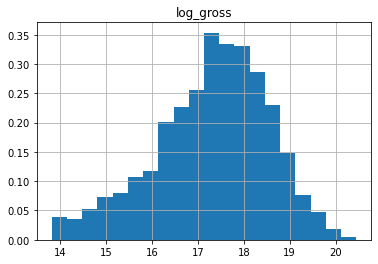

In [122]:
df.hist(column=['log_gross'], bins=20, density =True)

In [123]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log.fit(df[subset], df['log_gross'])

LinearRegression()

In [124]:
y_log_pred = lm_log.predict(df[subset])

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_gross'>

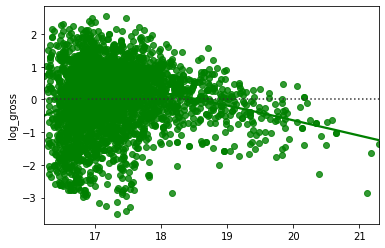

In [125]:
sns.residplot(y_log_pred, df['log_gross'], lowess=True, color="g")

In [126]:
log_residuals =  df['log_gross']- y_log_pred

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


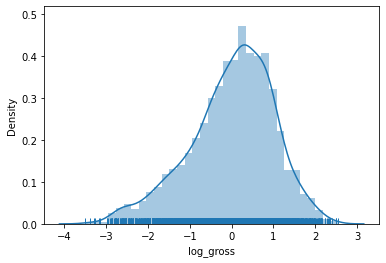

In [127]:
sns.distplot(log_residuals, kde=True, rug=True);

In [128]:
print (stats.shapiro(log_residuals)) #testing p-value of errors


ShapiroResult(statistic=0.9794542789459229, pvalue=5.55747175280919e-20)


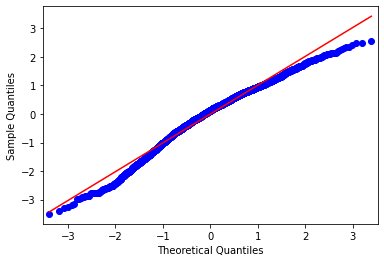

In [129]:
fig = sm.qqplot(log_residuals,line='s')
plt.show()

___

Let's look for outliers in the features

In [130]:
df['budget_log'] = np.log(df['budget'])

In [131]:
subset[2] = 'budget_log'

In [132]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [subset[i:i+n] for i in range(0, len(subset), n) ]

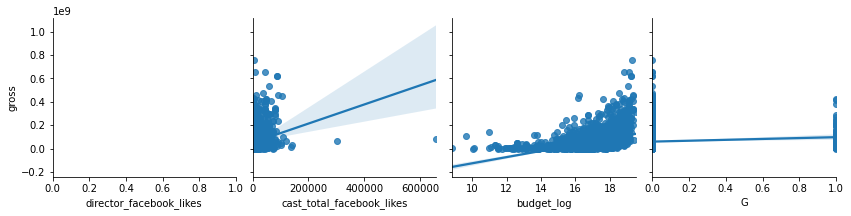

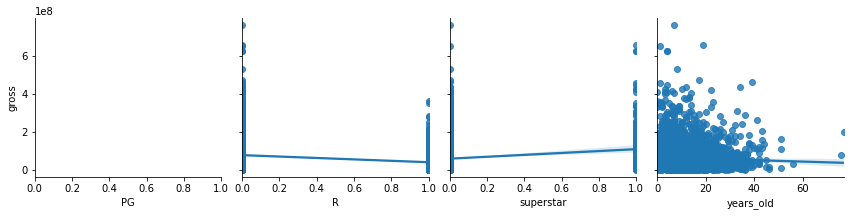

In [133]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

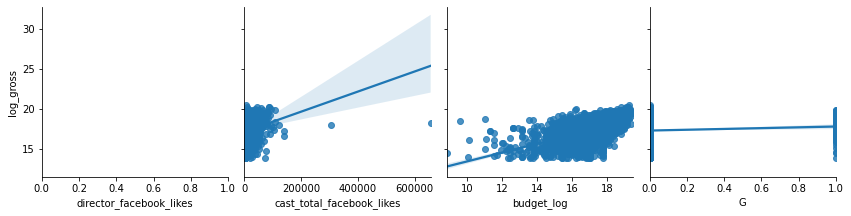

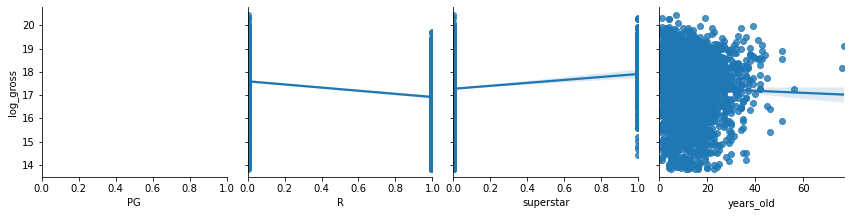

In [134]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['log_gross'],x_vars=i, kind="reg", height=3)

In [135]:
df['actor_1_facebook_likes'].describe()

count      2876.000000
mean       8188.299374
std       11922.995140
min           0.000000
25%         839.000000
50%        2000.000000
75%       13000.000000
max      200000.000000
Name: actor_1_facebook_likes, dtype: float64

In [136]:
df['cast_total_facebook_likes'].describe()

count      2876.000000
mean      12581.112656
std       20262.833904
min           0.000000
25%        2371.000000
50%        4765.500000
75%       17180.500000
max      656730.000000
Name: cast_total_facebook_likes, dtype: float64

In [137]:
df.shape

(2876, 34)

In [138]:
df = df[df['actor_1_facebook_likes']<630000]

In [139]:
df['actor_1_facebook_likes']= np.where(df['actor_1_facebook_likes'] >200000, 200000, df['actor_1_facebook_likes'])

In [140]:
df.shape

(2876, 34)

In [143]:
log_residuals.idxmax()

812

In [144]:
df.loc[812]

color                                                                    Color
director_name                                                       Tim Miller
num_critic_for_reviews                                                     579
duration                                                                   108
director_facebook_likes                                                     84
actor_3_facebook_likes                                                     361
actor_2_name                                                         Ed Skrein
actor_1_facebook_likes                                                   16000
gross                                                              3.63024e+08
actor_1_name                                                     Ryan Reynolds
movie_title                                                          Deadpool 
num_voted_users                                                         479047
cast_total_facebook_likes                           

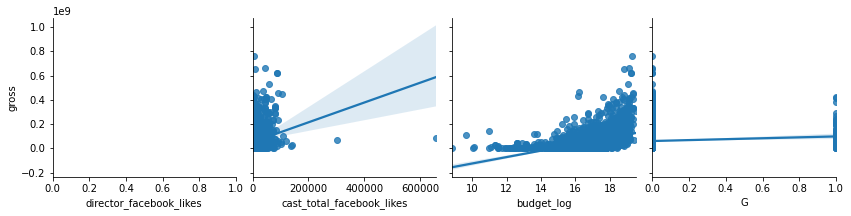

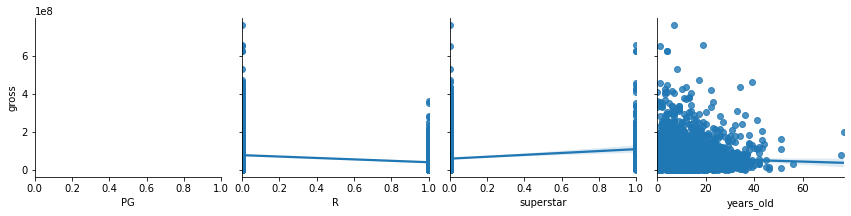

In [141]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)